### IMBD Movie review Classification Project

***

IMDB dataset having 50K movie reviews for natural language processing or Text analytics.

This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training and 25,000 for testing. So, predict the number of positive and negative reviews using either classification or deep learning algorithms.

You can also download the dataset <a href = "https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews">here </a>

***

### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### Read IMDB Dataset

In [2]:
df= pd.read_csv('IMDB Dataset.csv')[0:400]

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


### Check Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     400 non-null    object
 1   sentiment  400 non-null    object
dtypes: object(2)
memory usage: 6.4+ KB


### View descriptive stats

In [5]:
df.describe()

,review,sentiment
count,400,400
unique,400,2
top,One of the other reviewers has mentioned that ...,negative
freq,1,210


### Check for imbalanced data

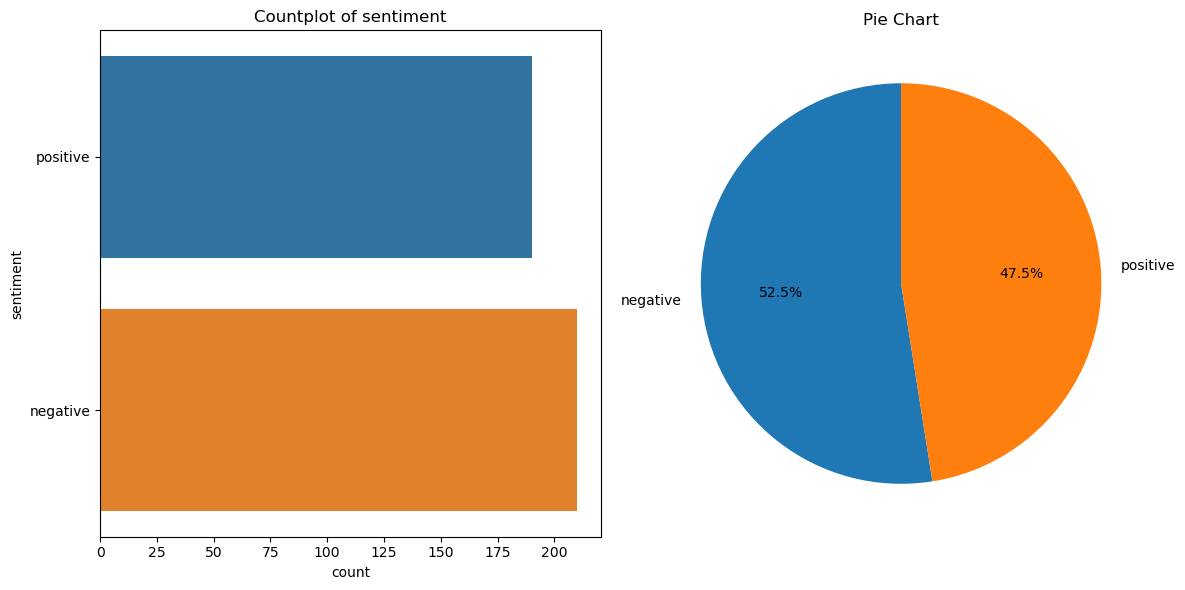

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(y = df['sentiment'],ax=axes[0])
axes[0].set_title('Countplot of sentiment')


sentiment_counts = df['sentiment'].value_counts()
axes[1].pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Pie Chart')

plt.tight_layout()
plt.show()

### Create a function to Preprocess the review column

In [7]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [8]:
def preprocess(sentence):
    #removes all the special characters and split the sentence at spaces
    text = re.sub(r"[^a-zA-Z0-9]"," ",sentence).split()
    
    # converts words to lowercase and removes any stopwords
    words = [x.lower() for x in text if x not in stopwords.words('english')]
    
    # Lemmatize the words
    lemma = WordNetLemmatizer()
    word = [lemma.lemmatize(word,'v') for word in words ]
    
    # convert the list of words back into a sentence
    word = ' '.join(word)
    return word

In [9]:
df['review']

0      One of the other reviewers has mentioned that ...
1      A wonderful little production. <br /><br />The...
2      I thought this was a wonderful way to spend ti...
3      Basically there's a family where a little boy ...
4      Petter Mattei's "Love in the Time of Money" is...
                             ...                        
395    I commented on this when it first debuted and ...
396    Just because someone is under the age of 10 do...
397    "Hey Babu Riba" is a film about a young woman,...
398    After a snowstorm, the roads are blocked and t...
399    This movie was a fairly entertaining comedy ab...
Name: review, Length: 400, dtype: object

In [10]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [11]:
df['review'] = df['review'].apply(preprocess)

### Print some text after applying the function

In [12]:
for i in range(10):
    print(df['review'][i])
    print()

one reviewers mention watch 1 oz episode hook they right exactly happen br br the first thing strike oz brutality unflinching scenes violence set right word go trust show faint hearted timid this show pull punch regard drug sex violence its hardcore classic use word br br it call oz nickname give oswald maximum security state penitentary it focus mainly emerald city experimental section prison cells glass front face inwards privacy high agenda em city home many aryans muslims gangstas latinos christians italians irish scuffle death star dodgy deal shady agreements never far away br br i would say main appeal show due fact go show dare forget pretty picture paint mainstream audiences forget charm forget romance oz mess around the first episode i ever saw strike nasty surreal i say i ready i watch i develop taste oz get accustom high level graphic violence not violence injustice crook guard sell nickel inmates kill order get away well mannered middle class inmates turn prison bitch due l

### Split the dataset into Input (X) & Target (y) variable

In [13]:
x=df['review']
y=df['sentiment']

In [14]:
x

0      one reviewers mention watch 1 oz episode hook ...
1      a wonderful little production br br the film t...
2      i think wonderful way spend time hot summer we...
3      basically family little boy jake think zombie ...
4      petter mattei love time money visually stun fi...
                             ...                        
395    i comment first debut give thumb middle review...
396    just someone age 10 mean stupid if child like ...
397    hey babu riba film young woman mariana nicknam...
398    after snowstorm roads block highway patrolman ...
399    this movie fairly entertain comedy murphy law ...
Name: review, Length: 400, dtype: object

### Convert y variable values into 0 and 1 from positive and negative

In [15]:
def zeroone(n):
    if n=='positive':
        return 0
    else:
        return 1

In [16]:
y=y.apply(zeroone)

In [17]:
y

0      0
1      0
2      0
3      1
4      0
      ..
395    1
396    1
397    0
398    1
399    0
Name: sentiment, Length: 400, dtype: int64

### Create Keras tokenizer object with 5000 max words
* Convert text to sequence
* Add padding

In [19]:
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [20]:
tokenizer = Tokenizer(num_words=5000)

In [21]:
tokenizer.fit_on_texts(x)
vocab_size = len(tokenizer.word_index) + 1
def text_encoding(txt):
    encoded_docs = tokenizer.texts_to_sequences(txt)
    
    padded_sequence = pad_sequences(encoded_docs, maxlen=128)    
       
    return padded_sequence
x=text_encoding(x)
x

array([[ 392, 4713,   11, ...,  457, 2423,  484],
       [   0,    0,    0, ..., 3195,   25,   77],
       [   0,    0,    0, ...,   17,    8,  394],
       ...,
       [ 383,  914, 2558, ...,    8,    3,   83],
       [   0,    0,    0, ...,  306, 2995, 1539],
       [   0,    0,    0, ...,  611,  778,   78]])

### Split the dataset into Training & Testing set

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.20)

### Create keras Sequential Model with LSTM Layers

In [24]:
from keras import Sequential
from keras import layers

In [25]:
model = Sequential([
    layers.Embedding(vocab_size, 128),
    layers.LSTM(128,  return_sequences=True),
    layers.Dropout(0.02),
    layers.LSTM(128),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dropout(0.02),
    layers.Dense(1, activation='sigmoid')
])

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Compile the model

In [27]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy',  metrics = ['accuracy'])

### Train the model with our training set

In [28]:
model.fit(X_train, y_train, epochs=10, validation_split = 0.02)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 289ms/step - accuracy: 0.5467 - loss: 0.6927 - val_accuracy: 0.5714 - val_loss: 0.6879
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 215ms/step - accuracy: 0.5579 - loss: 0.6668 - val_accuracy: 0.8571 - val_loss: 0.7306
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 214ms/step - accuracy: 0.9399 - loss: 0.3841 - val_accuracy: 0.8571 - val_loss: 0.5108
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 214ms/step - accuracy: 0.9796 - loss: 0.0747 - val_accuracy: 0.5714 - val_loss: 0.7496
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 206ms/step - accuracy: 0.9870 - loss: 0.0369 - val_accuracy: 1.0000 - val_loss: 0.0658
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 202ms/step - accuracy: 1.0000 - loss: 0.0113 - val_accuracy: 0.8571 - val_loss: 0.5062
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 209ms/step - accuracy: 1.0000 - loss: 0.0032 - val_accuracy: 0.8571 - val_loss: 0.5455
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 207ms/step - accuracy: 1.0000 - loss: 4.3580e-04 - val_accuracy

### Make prediction with X_test

In [30]:
y_pred=model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


### Convert to 0 and 1 with higher probability towards 1

In [31]:
pred=[]
for i in y_pred:
    if i > 0.5:
        pred.append(1)
    else:
        pred.append(0)

### Evaluate the model

In [32]:
model.evaluate(X_train,y_train)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.9994 - loss: 0.0027   


[0.014097991399466991, 0.996874988079071]

### Check accuracy score

In [33]:
from sklearn import metrics
metrics.accuracy_score(y_test,pred)

0.7875

### Check confusion matrix

<Axes: >

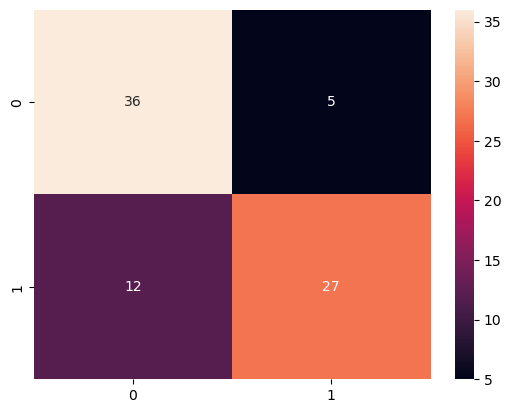

In [34]:
sns.heatmap(metrics.confusion_matrix(y_test,pred),annot=True,fmt='d')

### Print Classification report

In [35]:
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.75      0.88      0.81        41
           1       0.84      0.69      0.76        39

    accuracy                           0.79        80
   macro avg       0.80      0.79      0.78        80
weighted avg       0.80      0.79      0.79        80

